In [5]:
import numpy as np
import pandas as pd
#import pyflux as pf
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
NFLX = DataReader('NFLX',  'yahoo', datetime(2019,1,1), datetime(2019,12,31));

X = NFLX['Close'].values

NFLX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,269.750000,256.579987,259.279999,267.660004,11679500,267.660004
2019-01-03,275.790009,264.429993,270.200012,271.200012,14969600,271.200012
2019-01-04,297.799988,278.540009,281.880005,297.570007,19330100,297.570007
2019-01-07,316.799988,301.649994,302.100006,315.339996,18620100,315.339996
2019-01-08,320.589996,308.010010,319.980011,320.269989,15359200,320.269989


In [7]:
close=NFLX['Close']
#Y = AMZN['Close'].values;
close

Date
2019-01-02    267.660004
2019-01-03    271.200012
2019-01-04    297.570007
2019-01-07    315.339996
2019-01-08    320.269989
2019-01-09    319.959991
2019-01-10    324.660004
2019-01-11    337.589996
2019-01-14    332.940002
2019-01-15    354.640015
2019-01-16    351.390015
2019-01-17    353.190002
2019-01-18    339.100006
2019-01-22    325.160004
2019-01-23    321.989990
2019-01-24    326.670013
2019-01-25    338.049988
2019-01-28    335.660004
2019-01-29    328.899994
2019-01-30    340.660004
2019-01-31    339.500000
2019-02-01    339.850006
2019-02-04    351.339996
2019-02-05    355.809998
2019-02-06    352.190002
2019-02-07    344.709991
2019-02-08    347.570007
2019-02-11    345.730011
2019-02-12    359.970001
2019-02-13    351.769989
                 ...    
2019-11-18    302.570007
2019-11-19    302.600006
2019-11-20    305.160004
2019-11-21    311.690002
2019-11-22    310.480011
2019-11-25    315.549988
2019-11-26    312.489990
2019-11-27    315.929993
2019-11-29    314.66

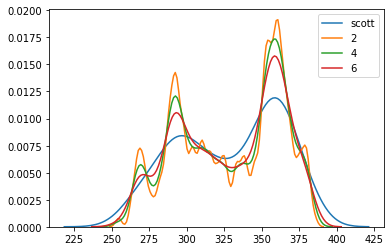

In [8]:
import seaborn as sns;
x='scott'
bw=[x,2,4,6]
for x in bw:
    ax = sns.kdeplot(close, bw=x, label = '{}'.format(x))
    ax

In [91]:
nflx_close = pd.DataFrame(NFLX.Close)

In [92]:
nflx_close['MA_9'] = nflx_close.Close.rolling(9).mean().shift()
nflx_close['MA_21'] = nflx_close.Close.rolling(21).mean()

In [93]:
nflx_close.head()

,Close,MA_9,MA_21
Date,,,
2019-01-02,267.660004,NaN,NaN
2019-01-03,271.200012,NaN,NaN
2019-01-04,297.570007,NaN,NaN
2019-01-07,315.339996,NaN,NaN
2019-01-08,320.269989,NaN,NaN


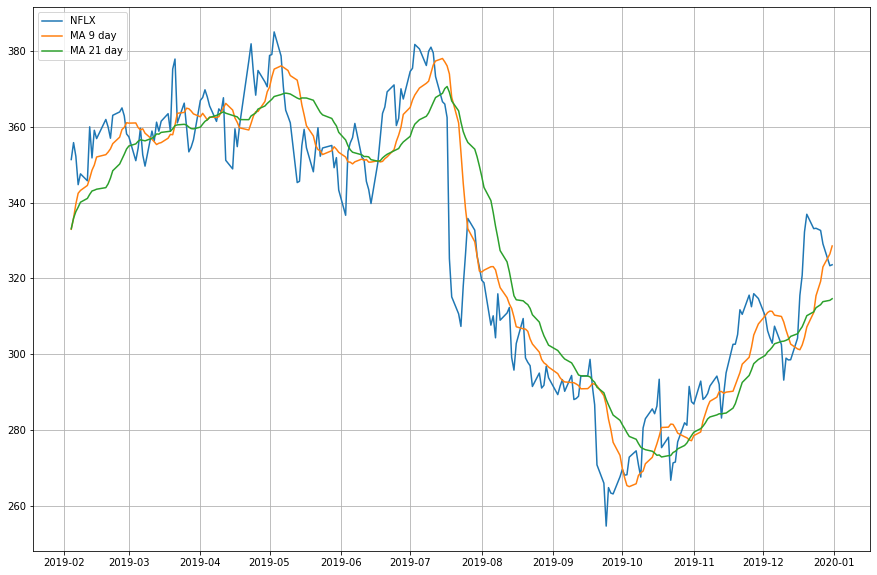

In [104]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(nflx_close['Close'],label='NFLX')
plt.plot(nflx_close['MA_9'], label='MA 9 day')
plt.plot(nflx_close['MA_21'], label='MA 21 day')
plt.legend(loc=2)

## Compute log change (instantaneous rate of return)

In [95]:
nflx_close["change"] = np.log(nflx_close["Close"] / nflx_close["Close"].shift())

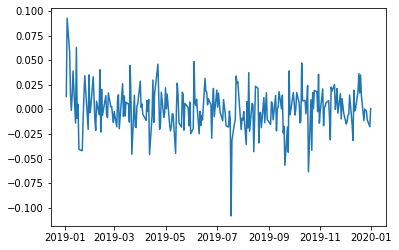

In [96]:
plt.plot(nflx_close.change)

##  Compute rolling historical volatility, offset using .shift() method

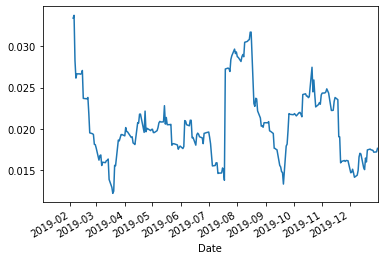

In [97]:
nflx_close['Volatility'] = nflx_close.change.rolling(21).std().shift() #21 bcos 21 trading days in a month
nflx_close['Volatility'].plot()

In [98]:
#offset expected change 1-day
nflx_close['exp_chng'] = nflx_close['Volatility'] * nflx_close['Close'].shift() #1-sd movement in the price
nflx_close['actual_chng'] = nflx_close['Close'] - nflx_close['Close'].shift()

In [99]:
nflx_close.head()

,Close,MA_9,MA_21,change,Volatility,exp_chng,actual_chng
Date,,,,,,,
2019-01-02,267.660004,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,271.200012,NaN,NaN,0.013139,NaN,NaN,3.540009
2019-01-04,297.570007,NaN,NaN,0.092793,NaN,NaN,26.369995
2019-01-07,315.339996,NaN,NaN,0.058002,NaN,NaN,17.769989
2019-01-08,320.269989,NaN,NaN,0.015513,NaN,NaN,4.929993


In [100]:
#running more than once will 
nflx_close = pd.DataFrame(nflx_close.iloc[22:])

In [101]:
nflx_close['Magnitude'] = nflx_close['actual_chng'] / nflx_close['exp_chng'] 

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,
         2.,  1.,  3.,  3.,  6.,  8.,  4.,  8.,  7., 12.,  6., 11., 15.,
        10.,  7., 13., 11., 12., 11.,  6.,  7.,  6., 15.,  8.,  9.,  2.,
         4.,  1.,  3.,  2.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-7.45670282e+00, -7.34536540e+00, -7.23402798e+00, -7.12269056e+00,
        -7.01135314e+00, -6.90001571e+00, -6.78867829e+00, -6.67734087e+00,
        -6.56600345e+00, -6.45466603e+00, -6.34332861e+00, -6.23199119e+00,
        -6.12065376e+00, -6.00931634e+00, -5.89797892e+00, -5.78664150e+00,
        -5.67530408e+00, -5.56396666e+00, -5.45262924e+00, -5.34129182e+00,
        -5.22995439e+00, -5.11861697e+00, -5.00727955e

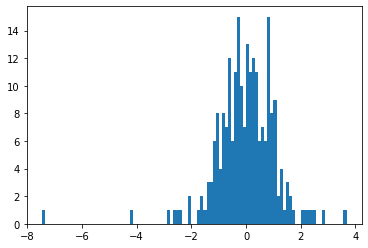

In [107]:
plt.hist(nflx_close['Magnitude'],bins = 100)

In [102]:
nflx_close['abs_magni'] = np.abs(nflx_close['Magnitude'])
nflx_close.head()

,Close,MA_9,MA_21,change,Volatility,exp_chng,actual_chng,Magnitude,abs_magni
Date,,,,,,,,,
2019-02-04,351.339996,332.937778,333.068096,0.033250,0.033398,11.350457,11.489990,1.012293,1.012293
2019-02-05,355.809998,335.846666,335.841429,0.012642,0.033738,11.853604,4.470001,0.377101,0.377101
2019-02-06,352.190002,339.604445,337.596191,-0.010226,0.028271,10.059134,-3.619995,-0.359871,0.359871
2019-02-07,344.709991,342.439999,338.760001,-0.021467,0.026139,9.205996,-7.480011,-0.812515,0.812515
2019-02-08,347.570007,343.179999,340.074764,0.008263,0.026655,9.188175,2.860016,0.311271,0.311271


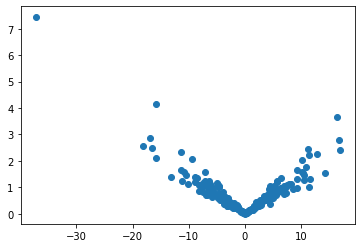

In [103]:
plt.scatter(nflx_close['actual_chng'], nflx_close['abs_magni'])